# Mnist dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('mnist/train.csv')
df.shape

(42000, 785)

In [11]:
l=df['label']
d=df.drop(columns=['label'],axis=0)

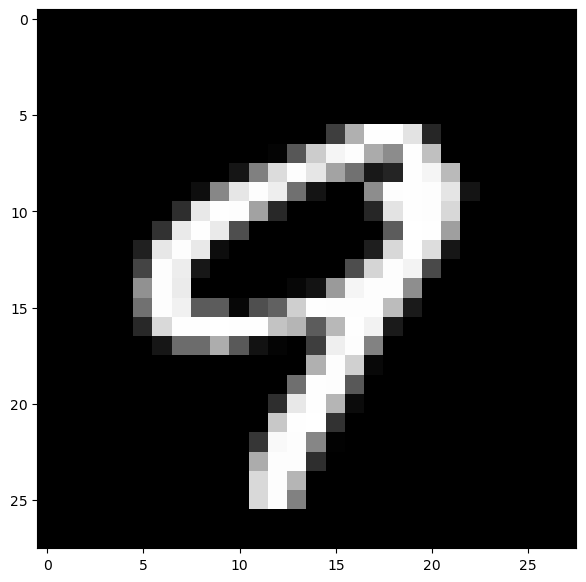

9


In [12]:
plt.figure(figsize=(7,7))
idx=100

grid_data=d.iloc[idx].to_numpy().reshape(28,28)#reshape 1D to 2D
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()

print(l[idx])

### 2D Visulaization using PCA :

In [13]:
# Pick first 15k data-points to work on for time-efficiency

labels=l.head(15000)
data=d.head(15000)

print("the shape of sample data =",data.shape)

the shape of sample data = (15000, 784)


In [14]:
## Data-preprocessing : Standardizing the data with  x_i-mu_i/std_i for each point.
# this ensure we have standardize the data by removing the mean and scaling to unit vector.



from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [15]:
# copy the standardized data (15k point) to sample_data
sample_data=standardized_data

<h2><bold> find the co-variance matrix which is : A^T * A</bold></h2>


In [16]:
# matrix multiplication using numpy
covar_matrix=np.matmul(sample_data.T,sample_data)

print("The shape of variance matrix =", covar_matrix.shape)

The shape of variance matrix = (784, 784)


In [17]:
# finding the top two eigen-values an
# d corresponding eigen-vectors
# for projecting onto a 2 Dim space.

from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to high values)
# eigh function will return the eigen values in ascending order
# this code generates only the top 2 (782 and 783) eigenvalues.
n=covar_matrix.shape[0]
values, vectors=eigh(covar_matrix,subset_by_index=[782,783])
print("shape of eigen vecotrs= ",vectors.shape)

# converting the eigen vectors into (2,d) shape of easyness of further comparision
vectors=vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)

shape of eigen vecotrs=  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [18]:
# projecting the original data sample on the plane
# formed by two principal eigen vectors by vector-vector multiplication.

new_coordinates=np.matmul(vectors,sample_data.T)
print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [19]:
# appending label to the 2d projected data
new_coordinates=np.vstack((new_coordinates,labels)).T

# for coloring the points we need labels
# creating a new data frame for ploting the labeled point
dataframe=pd.DataFrame(data=new_coordinates,columns=("1st_principal","2nd_principal","label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


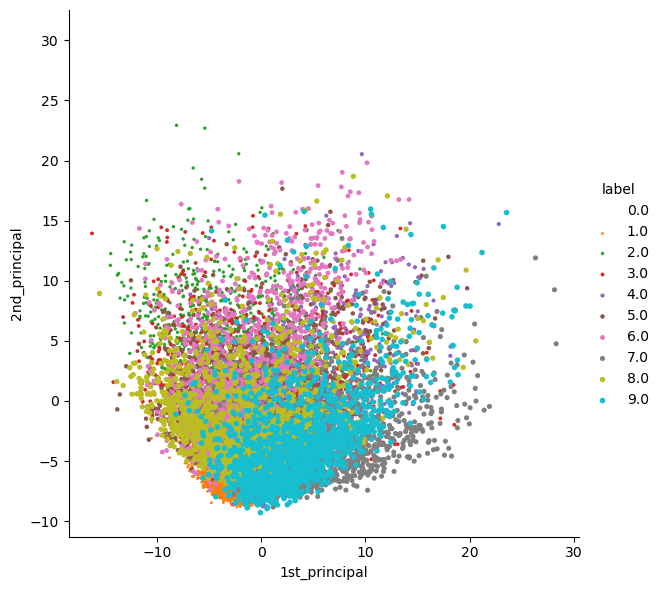

In [20]:
# ploting the 2d data points with seaborn
sns.FacetGrid(dataframe,hue='label',height=6).map(plt.scatter,'1st_principal','2nd_principal','label').add_legend()
print(dataframe.head());

In [21]:
## 784D--->2D : there is overlapping

### PCA using scikit learn

In [22]:
# initialize the pca
from sklearn import decomposition
pca=decomposition.PCA()

In [23]:
# configurig the pareameters
# the no. of components =2

pca.n_components=2
pca_data=pca.fit_transform(sample_data)

# pca_data=pca.fit_transform(sample_data)
print("shape of pca_reduced.shape =",pca_data.shape)

shape of pca_reduced.shape = (15000, 2)


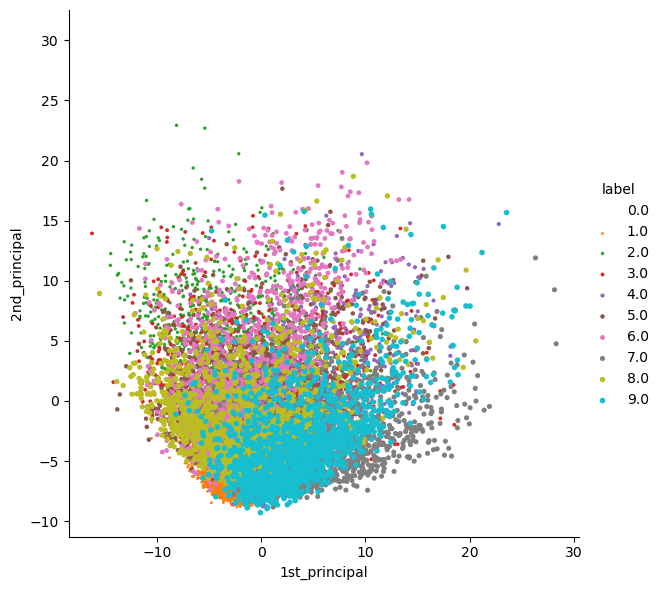

In [24]:
# attaching the label for each 2d data point

pca_data=np.vstack((pca_data.T,labels)).T

# creating a new data frame which help us in plotting the result data
pca_df=pd.DataFrame(data=pca_data,columns=('1st_principal','2nd_principal','label'))
sns.FacetGrid(dataframe,hue='label',height=6).map(plt.scatter,'1st_principal','2nd_principal','label').add_legend()
plt.show();

In [25]:
## PCA for dimensionality reduction (not vizualization)

# For visualization : 784 --->2 
# For ML Model (training) : 784 ---->10 (d->d' where d'<=d)

In [26]:
### 784 d --->200 dim

# X(15000*784) * v(784*200)===== X'(15000*200)

# let v be our covar matrix our top eigen vector corresponding to lambda_1 is v_1.


In [27]:
# in pca we are tryin to max variance of proj point  
# how much var is explained 784>>>>>10,20,30..... (to choose d')



# 784 -------->10 dim
# varinace explained in 10 dim : sum(lambda_1 to lambda_10))/sum of lambda_1 to lambda_784
# it gives % i.e 0.2 i.e 20% of total variance in 784 is explained in  projected 10 dimension

### To retain 90% of information :

sum(lambda_i to d')/sum of (lambda_1 to 784)=0.9

### PCA for dimensionality reduction (not for visulaization):



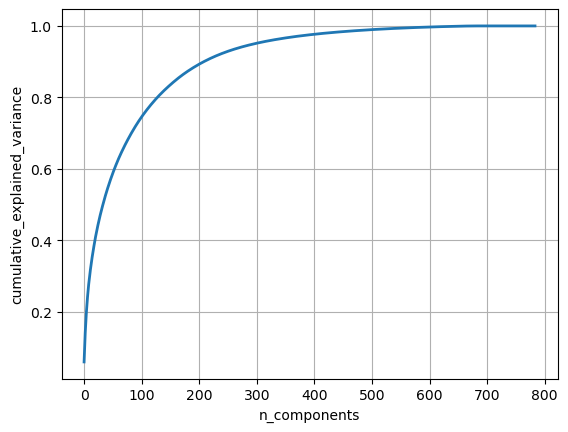

In [28]:
pca.n_components=784;
pca_data=pca.fit_transform(sample_data)

percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)

#pca.explained_variance_====lambda_i value

cum_var_explained=np.cumsum(percentage_var_explained)


# plot the pca spectrum

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_explained_variance')
plt.show()